In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np

In [2]:
last = pd.read_csv('data/last.csv').ffill()
volume = pd.read_csv('data/volume.csv')
mkt_cap = pd.read_csv('data/mkt_cap.csv')
sector = pd.read_csv('data/sector.csv')
tickers = last['ticker'].unique()
# alldata = last.merge(volume, on=['ticker', 'date'], how='inner')

In [3]:
last["t_days"] = last.groupby("ticker")["date"].cumcount()
last

,ticker,date,last,t_days
0,1332 JT,2017-08-16,562.12,0
1,1332 JT,2017-08-17,560.36,1
2,1332 JT,2017-08-18,553.32,2
3,1332 JT,2017-08-21,544.53,3
4,1332 JT,2017-08-22,535.73,4
...,...,...,...,...
420532,9984 JT,2024-02-29,8790.00,1594
420533,9984 JT,2024-03-01,8907.00,1595
420534,9984 JT,2024-03-04,8934.00,1596
420535,9984 JT,2024-03-05,9008.00,1597


In [4]:
JT1332 = last.loc[last["ticker"] == "1332 JT"]
JT1332.set_index("date", inplace=True)
# JT1332.reset_index(inplace=True)
JT1332

,ticker,last,t_days
date,,,
2017-08-16,1332 JT,562.12,0
2017-08-17,1332 JT,560.36,1
2017-08-18,1332 JT,553.32,2
2017-08-21,1332 JT,544.53,3
2017-08-22,1332 JT,535.73,4
...,...,...,...
2024-02-29,1332 JT,952.60,1594
2024-03-01,1332 JT,951.10,1595
2024-03-04,1332 JT,944.90,1596


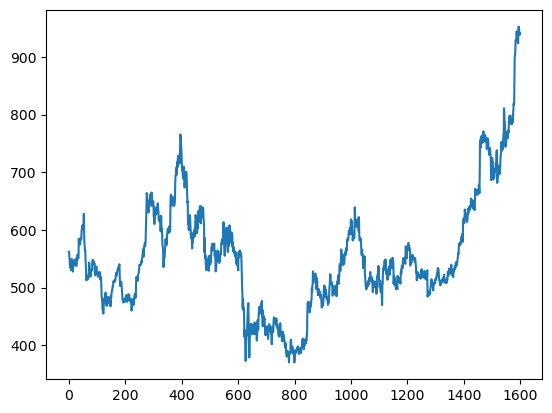

In [5]:
import matplotlib.pyplot as plt

plt.plot(JT1332["t_days"], JT1332["last"])

In [20]:
0.5 * np.power(JT1332["last"].rolling(5).corr(JT1332["t_days"]), 2) + 0.5

date
2017-08-16         NaN
2017-08-17         NaN
2017-08-18         NaN
2017-08-21         NaN
2017-08-22    0.978917
                ...   
2024-02-29    0.704170
2024-03-01    0.831348
2024-03-04    0.654591
2024-03-05    0.885027
2024-03-06    0.916415
Length: 1599, dtype: float64

In [23]:
stock_returns = pd.DataFrame(index=tickers, columns=['Strat Return', 'Hold Return'])
stock_returns.loc["1332 JT"] = (3,3)
stock_returns

,Strat Return,Hold Return
1332 JT,3,3
1333 JT,NaN,NaN
1334 JT,NaN,NaN
1605 JT,NaN,NaN
1721 JT,NaN,NaN
...,...,...
9735 JT,NaN,NaN
9766 JT,NaN,NaN
9843 JT,NaN,NaN
9983 JT,NaN,NaN
